## 2. Agrupamiento

En este punto se busca analizar si es posible agrupar los datos en función de algún criterio. Para esta tarea se utilizará el algoritmo K-Means para generar clusters con los datos. 

In [2]:
import sklearn as sklearn
from sklearn.cluster import KMeans

In [3]:
# ESTO ES PARA TENERLO EN LA NOTEBOOK SEPARADA
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import scipy.stats as st

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

from matplotlib import patches

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None


df_preprocesado = pd.read_csv('df_preprocesado_v2.csv')

In [ ]:
dataset_array = df_preprocesado.values
print(dataset_array.dtype)
print(dataset_array)

object
[['2021-09-09' -34.6373187 -58.361124 ... 55.0 82900.0
  'VENTA TRES AMBIENTES LA BOCA PISO ALTO']
 ['2021-09-09' -34.6286465 -58.3618713 ... 70.0 99000.0
  'Departamento - 4 Ambientes - Catalinas Sur']
 ['2021-09-09' -34.6100272 -58.4019341 ... 104.0 146000.0
  'Venta departamento 4 ambientes Once']
 ...
 ['2021-01-05' -34.614175 -58.4790625 ... 30.0 75500.0
  'VENTA MONOAMBIENTE CON PATIO SOL DE MAÑANA //// APTO CREDITO HIPOTECARIO']
 ['2021-01-05' -34.614175 -58.4790625 ... 31.0 74500.0
  'VENTA MONOAMBIENTE APAISADO y DIVISIBLE AL CF C/ BALCÓN Vta Ata, PISO ALTO. BAJAS EXP. // APTO CRED.']
 ['2021-01-05' -34.59979 -58.373411 ... 84.0 135000.0
  'VENTA DEPTO 2 1/2 AMBIENTES - CENTRO']]


Como se observa y habíamos visto anteriormente, se tienen bastantes variables cualitativas por ende tomamos solo aquellas que son cuantitativas para poder utilizar el algoritmo de K means

In [28]:
from pyclustertend import hopkins
ds_properati_numeric = df_preprocesado.select_dtypes(include=np.number)
ds_properati_numeric.head()


,latitud,longitud,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price
0,-34.637319,-58.361124,3.0,2.0,58.000000,55.0,82900.0
1,-34.628647,-58.361871,4.0,3.0,70.000000,70.0,99000.0
2,-34.610027,-58.401934,4.0,2.0,124.408727,104.0,146000.0
3,-34.631621,-58.416825,4.0,2.0,97.673080,73.0,250000.0
4,-34.623886,-58.412746,2.0,1.0,61.000000,46.0,100000.0


Una vez que ya tenemos nuestro Dataset lo normalizamos usando Min Max Scaler para que las variables cuantitativas que poseen distinta unidad de medida puedan ser facilmente comparables teniendo un mismo peso.

In [30]:
from sklearn.preprocessing import scale, MinMaxScaler

scaler = MinMaxScaler()
ds_properati_numeric_escalado = scaler.fit_transform(ds_properati_numeric)

In [ ]:
hopkins(ds_properati_numeric_escalado,ds_properati_numeric_escalado.shape[0])
#hopkins(ds_properati_numeric,ds_properati_numeric.shape[0])

KeyboardInterrupt: 

- Podemos ver que hay una alta tendencia a formar clusters ya que segun la documentacion cuando hopkins() resulta un numero tendiendo a 0 significa que hay una alta clusterizacion 
- Una vez calculada la tendecia a formar clusters usamos la regla del codo para poder determinar el numero de clusters

KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_common._relocate_empty_clusters_dense'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 2, in where
KeyboardInterrupt: 


KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_common._relocate_empty_clusters_dense'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 2, in where
KeyboardInterrupt: 


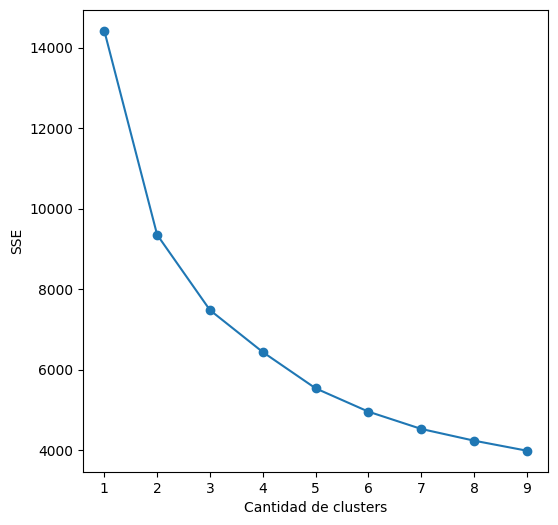

In [ ]:
# Corro el algoritmo con K entre 2 y 10 y voy guardando el error para luego graficarlo.
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(ds_properati_numeric_escalado)
    sse.append(km.inertia_)

# Grafico el SSE por K
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Cantidad de clusters')
plt.ylabel('SSE')
plt.show()

- Observando el grafico podemos concluir que se formarian de 3 a 4 clusters . 
- Para verificar esto utilizamos el algoritmo de Sillouette

In [ ]:
from sklearn.metrics import silhouette_score

list_k = range(2, 6)

for n_clusters in list_k:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(ds_properati_numeric_escalado)

    score = silhouette_score (ds_properati_numeric_escalado, preds)
    print ("For n_clusters =" + str(n_clusters) + " silhouette score is " + str(score))

KeyboardInterrupt: 

El score de silhouette resulta mejor para 2 que para 3,4,5 clusters, entonces podemos continuar con 2.

Procedemos a visualizar dicho score graficamente

In [ ]:
# !pip install --quiet yellowbrick==1.5  # Comentado porque creo que alcanza con añadirlo a requirements.txt

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


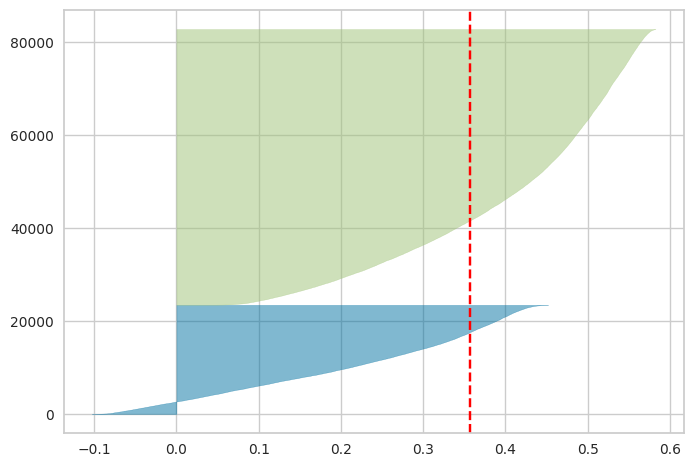

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

model = KMeans(2, random_state=0)

# Visualizamos el gráfico de silueta
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')    # Instancio el visualizador
visualizer.fit(ds_properati_numeric_escalado)
plt.show()

In [31]:
kmeans = KMeans(n_clusters=2)  #Creamos un objeto de la clase KMeans para realizar el agrupamiento

kmeans.fit(ds_properati_numeric_escalado) #Entrenamos el algoritmo para que aprenda cómo agrupar

y_kmeans = kmeans.predict(ds_properati_numeric_escalado)

Ahora procedemos a analizar y graficar los grupos formados

In [32]:
def columns_names():
    for i in range(0,7):
        columns_name = ds_properati_numeric.columns[i]
        print(i, columns_name)

In [33]:
# group1 = ds_properati_numeric_escalado[y_kmeans == 0]
# group2 = ds_properati_numeric_escalado[y_kmeans == 1]
# group3 = ds_properati_numeric_escalado[y_kmeans == 2]
group1 = ds_properati_numeric[y_kmeans == 0]
group2 = ds_properati_numeric[y_kmeans == 1]
#group3 = ds_properati_numeric[y_kmeans == 2]

In [34]:
group1.head()

,latitud,longitud,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price
0,-34.637319,-58.361124,3.0,2.0,58.0,55.0,82900.0
4,-34.623886,-58.412746,2.0,1.0,61.0,46.0,100000.0
5,-34.625588,-58.423056,4.0,2.0,104.0,54.0,185000.0
6,-34.629398,-58.425852,2.0,1.0,62.0,44.0,100000.0
7,-34.620748,-58.412004,3.0,2.0,59.0,55.0,185000.0


In [ ]:
columns_names()

0 latitud
1 longitud
2 property_rooms
3 property_bedrooms
4 property_surface_total
5 property_surface_covered
6 property_price


Primero analizamos las visualizaciones de distintas combinaciones de variables 

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


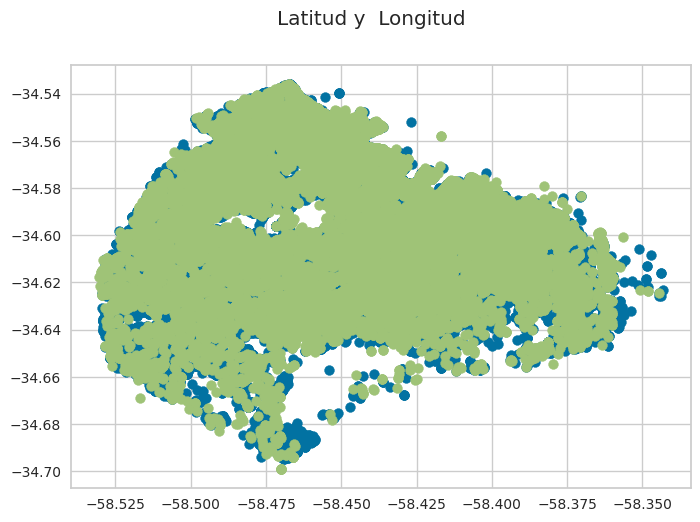

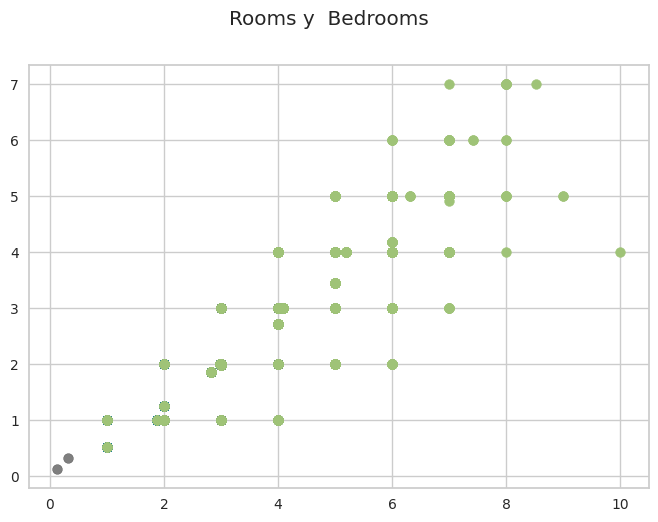

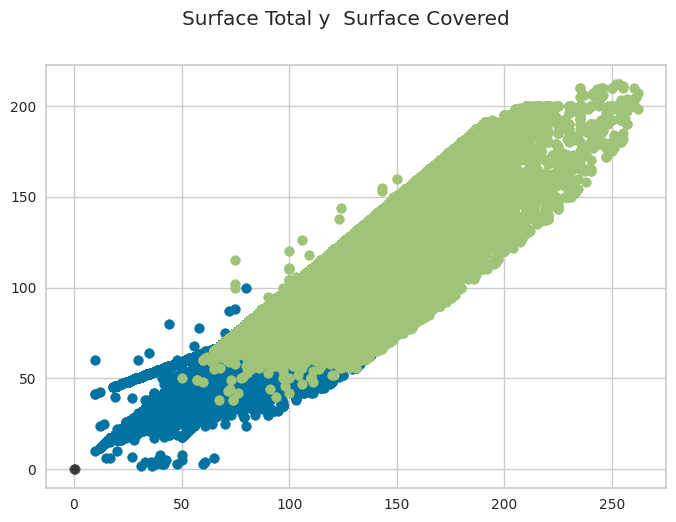

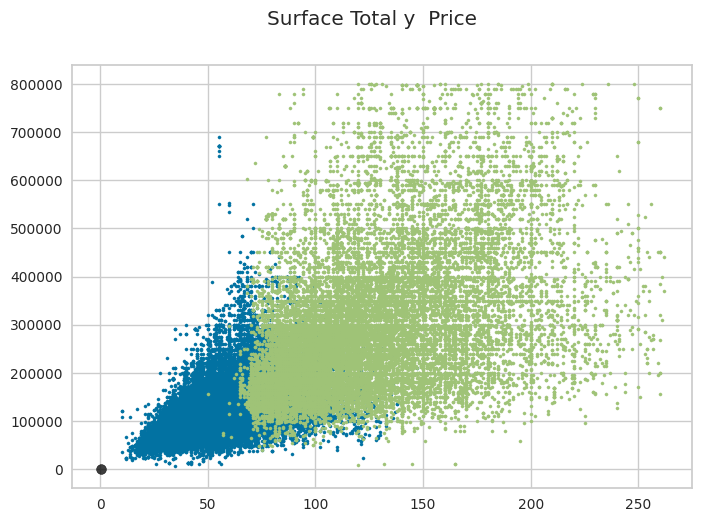

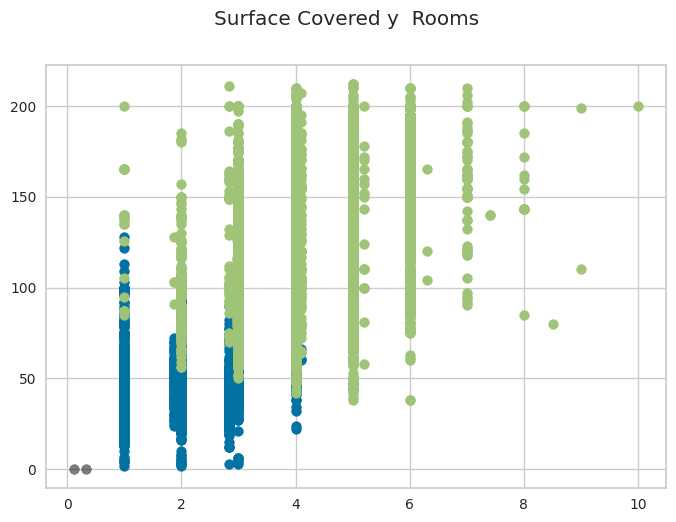

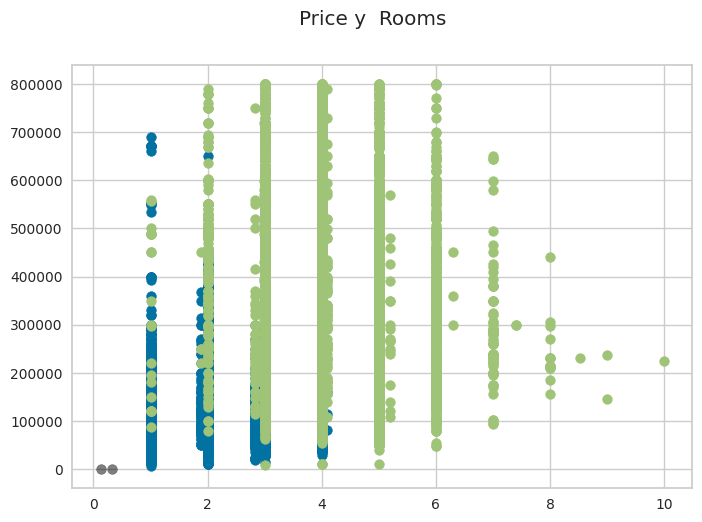

In [ ]:
fig, ax = plt.subplots(1)
fig.suptitle('Latitud y  Longitud')
# plt.scatter(group1.iloc[:, 0], group1.iloc[:, 1],s=50 ,cmap='viridis')
# plt.scatter(group2.iloc[:, 0], group2.iloc[:, 1],s=50 ,cmap='viridis')
# plt.scatter(group3.iloc[:, 0], group3.iloc[:, 1],s=50 ,cmap='viridis')
plt.scatter(x=group1.longitud, y=group1.latitud,s=50 ,cmap='viridis')
plt.scatter(x=group2.longitud, y=group2.latitud,s=50 ,cmap='viridis')
#plt.scatter(x=group3.longitud, y=group3.latitud,s=50 ,cmap='viridis')

fig, ax = plt.subplots(1)
fig.suptitle('Rooms y  Bedrooms')
plt.scatter(group1.iloc[:, 2], group1.iloc[:, 3],s=50 ,cmap='viridis')
plt.scatter(group2.iloc[:, 2], group2.iloc[:, 3],s=50 ,cmap='viridis')
#plt.scatter(group3.iloc[:, 2], group3.iloc[:, 3],s=50 ,cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 2], centers[:, 2], c='black', s=200, alpha=0.5,marker='.')

fig, ax = plt.subplots(1)
fig.suptitle('Surface Total y  Surface Covered')
plt.scatter(group1.iloc[:, 4], group1.iloc[:, 5],s=50 ,cmap='viridis')
plt.scatter(group2.iloc[:, 4], group2.iloc[:, 5],s=50 ,cmap='viridis')
#plt.scatter(group3.iloc[:, 4], group3.iloc[:, 5],s=50 ,cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 4], centers[:, 4], c='black', s=200, alpha=0.5,marker='.')

fig, ax = plt.subplots(1)
fig.suptitle('Surface Total y  Price')
plt.scatter(group1.iloc[:, 4], group1.iloc[:, 6],s=5 ,cmap='viridis')
plt.scatter(group2.iloc[:, 4], group2.iloc[:, 6],s=5 ,cmap='viridis')
#plt.scatter(group3.iloc[:, 4], group3.iloc[:, 6],s=50 ,cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 4], centers[:, 4], c='black', s=200, alpha=0.5,marker='.')

fig, ax = plt.subplots(1)
fig.suptitle('Surface Covered y  Rooms')
plt.scatter(group1.iloc[:, 2], group1.iloc[:, 5],s=50 ,cmap='viridis')
plt.scatter(group2.iloc[:, 2], group2.iloc[:, 5],s=50 ,cmap='viridis')
#plt.scatter(group3.iloc[:, 2], group3.iloc[:, 5],s=50 ,cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 2], centers[:, 2], c='black', s=200, alpha=0.5,marker='.')

fig, ax = plt.subplots(1)
fig.suptitle('Price y  Rooms')
plt.scatter(group1.iloc[:, 2], group1.iloc[:, 6],s=50,cmap='viridis')
plt.scatter(group2.iloc[:, 2], group2.iloc[:, 6],s=50,cmap='viridis')
#plt.scatter(group3.iloc[:, 2], group3.iloc[:, 6],s=50 ,cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 2], centers[:, 2], c='black', s=200, alpha=0.5,marker='.')
fig.show()


- CONCLUSIONES CON 2 CLUSTERS
### [Ramiro] - Haciendo zoom a los graficos, salvo en el primero, no se ven clusters, los puntos se cruzan entre grupos sin mostrar ningun tipo de patron.
- Podemos ver en el grafico de Latitud y longitud que los clusters se forman por cercania/ zonas. Sabiendo que cada todas las propiedades se encuentran en capital federal podemos decir que se agrypan en 3 zonas principalmente.
- Podemos ver en el grafico de Rooms y Bedrooms ...
- Podemos ver en el grafico de Surface Total y Surface covered ...
- Podemos ver en el grafico de Surface Total y Price ...
- Podemos ver en el grafico de Rooms y Surface covered ...
- Podemos ver en el grafico de Rooms y Price  ...



findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


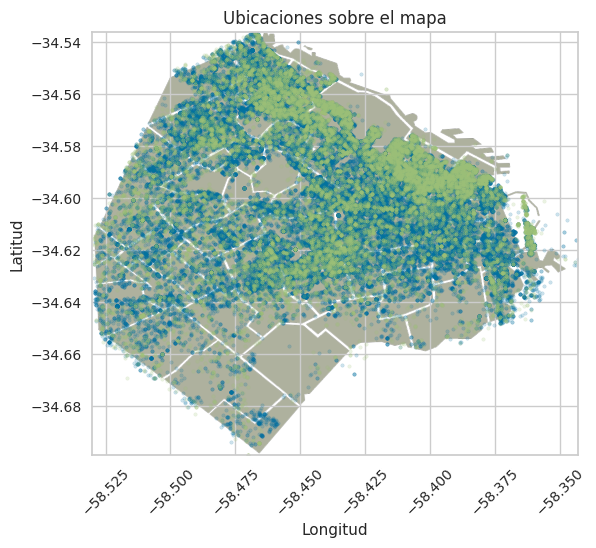

In [ ]:
# calculamos limites de la imagen
lat_min = ds_properati_numeric['latitud'].min()
lat_max = ds_properati_numeric['latitud'].max()
long_min = ds_properati_numeric['longitud'].min()
long_max = ds_properati_numeric['longitud'].max()

# seteamos limites del grafico
plt.xlim([long_min, long_max])
plt.ylim([lat_min,lat_max])

# cargamos imagen y ajustamos su tamaño
im = plt.imread("mapa.png")
plt.imshow(im, extent=[long_min-0.0075, long_max+0.0025, lat_min, lat_max])

# graficamos los puntos
plt.scatter(x=group1.longitud,y=group1.latitud ,s=25 ,cmap='viridis', alpha=0.2, marker='.')
plt.scatter(x=group2.longitud,y=group2.latitud ,s=25 ,cmap='viridis', alpha=0.2, marker='.')
#plt.scatter(x=group3.longitud,y=group3.latitud ,s=25 ,cmap='viridis', alpha=0.1, marker='.')

plt.title('Ubicaciones sobre el mapa')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.tick_params(axis='x', labelrotation = 45)
plt.show()

- Ahora repetimos el proceso anterior pero intentando formar 3 clusters

In [ ]:
kmeans = KMeans(n_clusters=3)  #Creamos un objeto de la clase KMeans para realizar el agrupamiento

kmeans.fit(ds_properati_numeric_escalado) #Entrenamos el algoritmo para que aprenda cómo agrupar

y_kmeans = kmeans.predict(ds_properati_numeric_escalado)

In [ ]:
group1 = ds_properati_numeric[y_kmeans == 0]
group2 = ds_properati_numeric[y_kmeans == 1]
group3 = ds_properati_numeric[y_kmeans == 2]

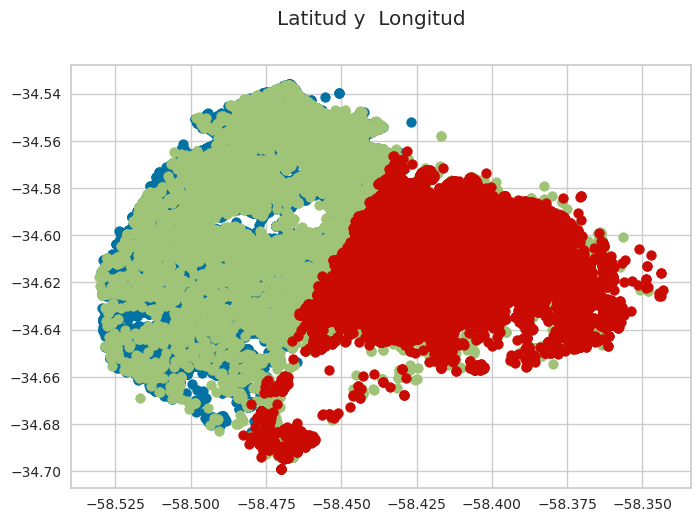

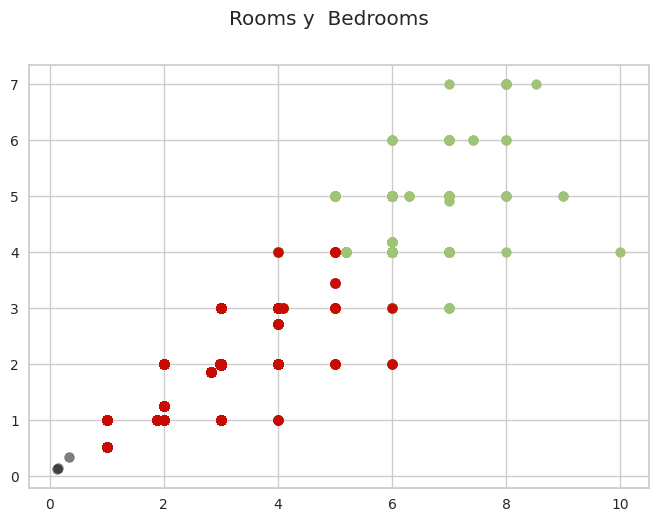

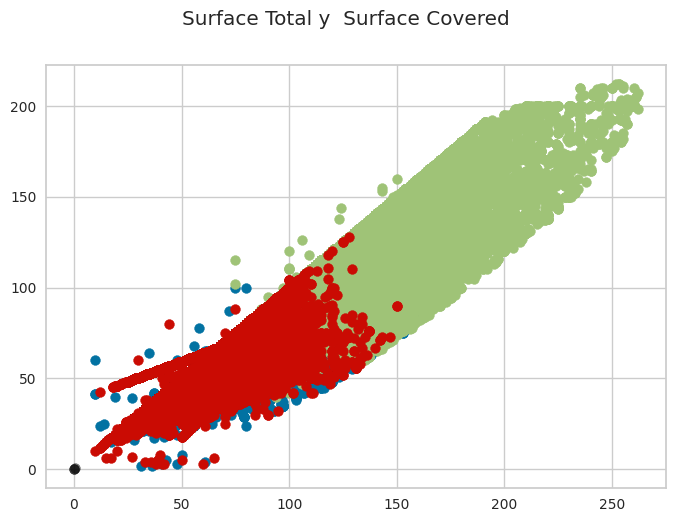

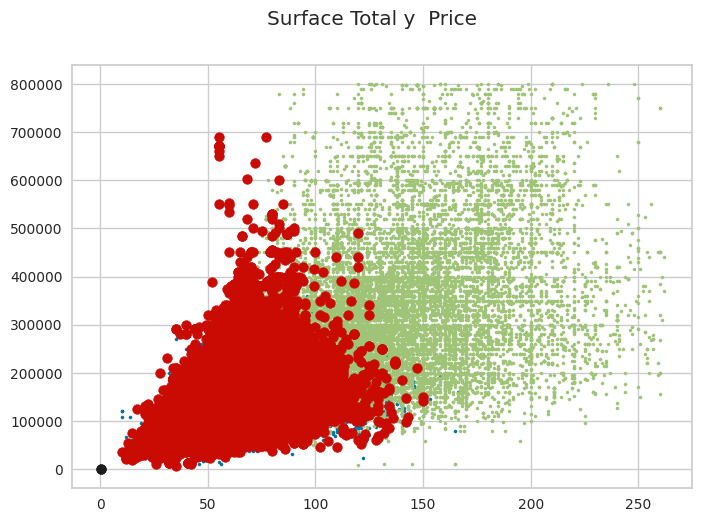

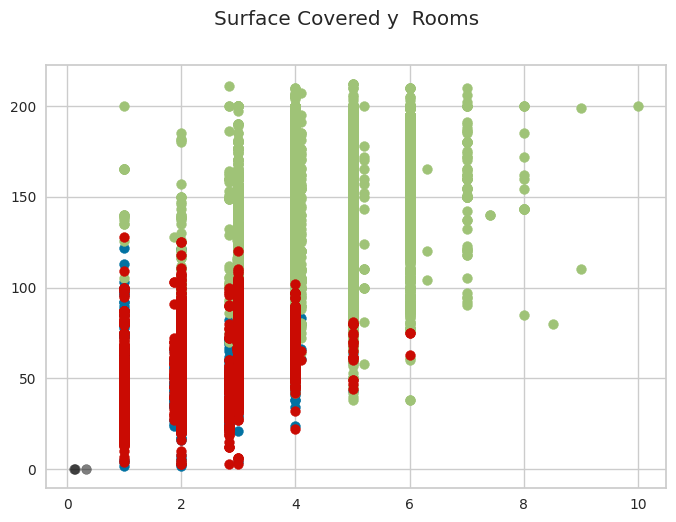

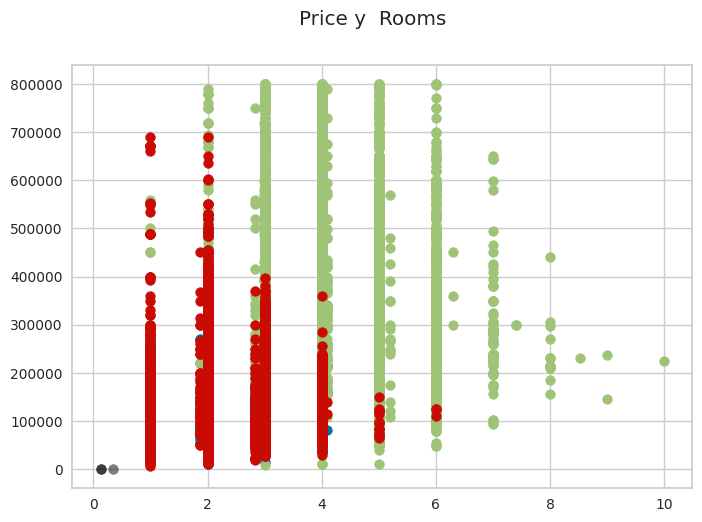

In [ ]:
fig, ax = plt.subplots(1)
fig.suptitle('Latitud y  Longitud')
# plt.scatter(group1.iloc[:, 0], group1.iloc[:, 1],s=50 ,cmap='viridis')
# plt.scatter(group2.iloc[:, 0], group2.iloc[:, 1],s=50 ,cmap='viridis')
# plt.scatter(group3.iloc[:, 0], group3.iloc[:, 1],s=50 ,cmap='viridis')
plt.scatter(x=group1.longitud, y=group1.latitud,s=50 ,cmap='viridis')
plt.scatter(x=group2.longitud, y=group2.latitud,s=50 ,cmap='viridis')
plt.scatter(x=group3.longitud, y=group3.latitud,s=50 ,cmap='viridis')

fig, ax = plt.subplots(1)
fig.suptitle('Rooms y  Bedrooms')
plt.scatter(group1.iloc[:, 2], group1.iloc[:, 3],s=50 ,cmap='viridis')
plt.scatter(group2.iloc[:, 2], group2.iloc[:, 3],s=50 ,cmap='viridis')
plt.scatter(group3.iloc[:, 2], group3.iloc[:, 3],s=50 ,cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 2], centers[:, 2], c='black', s=200, alpha=0.5,marker='.')

fig, ax = plt.subplots(1)
fig.suptitle('Surface Total y  Surface Covered')
plt.scatter(group1.iloc[:, 4], group1.iloc[:, 5],s=50 ,cmap='viridis')
plt.scatter(group2.iloc[:, 4], group2.iloc[:, 5],s=50 ,cmap='viridis')
plt.scatter(group3.iloc[:, 4], group3.iloc[:, 5],s=50 ,cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 4], centers[:, 4], c='black', s=200, alpha=0.5,marker='.')

fig, ax = plt.subplots(1)
fig.suptitle('Surface Total y  Price')
plt.scatter(group1.iloc[:, 4], group1.iloc[:, 6],s=5 ,cmap='viridis')
plt.scatter(group2.iloc[:, 4], group2.iloc[:, 6],s=5 ,cmap='viridis')
plt.scatter(group3.iloc[:, 4], group3.iloc[:, 6],s=50 ,cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 4], centers[:, 4], c='black', s=200, alpha=0.5,marker='.')

fig, ax = plt.subplots(1)
fig.suptitle('Surface Covered y  Rooms')
plt.scatter(group1.iloc[:, 2], group1.iloc[:, 5],s=50 ,cmap='viridis')
plt.scatter(group2.iloc[:, 2], group2.iloc[:, 5],s=50 ,cmap='viridis')
plt.scatter(group3.iloc[:, 2], group3.iloc[:, 5],s=50 ,cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 2], centers[:, 2], c='black', s=200, alpha=0.5,marker='.')

fig, ax = plt.subplots(1)
fig.suptitle('Price y  Rooms')
plt.scatter(group1.iloc[:, 2], group1.iloc[:, 6],s=50,cmap='viridis')
plt.scatter(group2.iloc[:, 2], group2.iloc[:, 6],s=50,cmap='viridis')
plt.scatter(group3.iloc[:, 2], group3.iloc[:, 6],s=50 ,cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 2], centers[:, 2], c='black', s=200, alpha=0.5,marker='.')
fig.show()


- CONCLUSIONES CON 3 CLUSTERS:

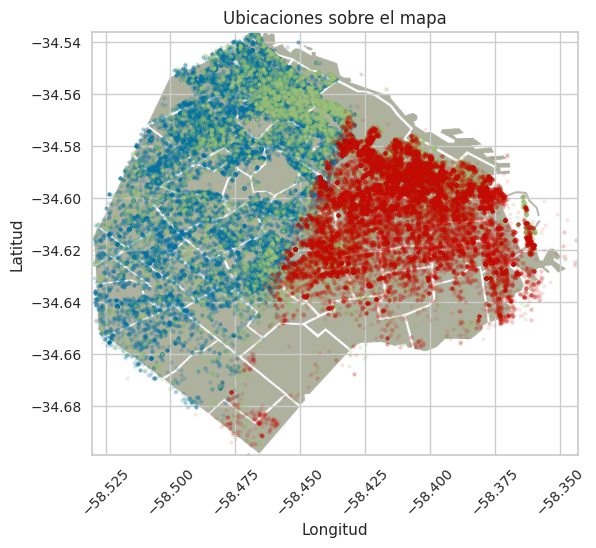

In [ ]:
# calculamos limites de la imagen
lat_min = ds_properati_numeric['latitud'].min()
lat_max = ds_properati_numeric['latitud'].max()
long_min = ds_properati_numeric['longitud'].min()
long_max = ds_properati_numeric['longitud'].max()

# seteamos limites del grafico
plt.xlim([long_min, long_max])
plt.ylim([lat_min,lat_max])

# cargamos imagen y ajustamos su tamaño
im = plt.imread("mapa.png")
plt.imshow(im, extent=[long_min-0.0075, long_max+0.0025, lat_min, lat_max])

# graficamos los puntos
plt.scatter(x=group1.longitud,y=group1.latitud ,s=25 ,cmap='viridis', alpha=0.2, marker='.')
plt.scatter(x=group2.longitud,y=group2.latitud ,s=25 ,cmap='viridis', alpha=0.2, marker='.')
plt.scatter(x=group3.longitud,y=group3.latitud ,s=25 ,cmap='viridis', alpha=0.1, marker='.')

plt.title('Ubicaciones sobre el mapa')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.tick_params(axis='x', labelrotation = 45)
plt.show()

## 3. Clasificación

### a) Construcción del target

In [4]:
ds_target= df_preprocesado.copy()

- Creamos la nueva columna tipo_precio .

In [5]:
ds_target["tipo_precio"] = ""

In [6]:
ds_target.head()

,start_date,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title,tipo_precio
0,2021-09-09,-34.637319,-58.361124,Boca,Departamento,3.0,2.0,58.000000,55.0,82900.0,VENTA TRES AMBIENTES LA BOCA PISO ALTO,
1,2021-09-09,-34.628647,-58.361871,Boca,Departamento,4.0,3.0,70.000000,70.0,99000.0,Departamento - 4 Ambientes - Catalinas Sur,
2,2021-09-09,-34.610027,-58.401934,Once,Departamento,4.0,2.0,124.408727,104.0,146000.0,Venta departamento 4 ambientes Once,
3,2021-09-09,-34.631621,-58.416825,Boedo,PH,4.0,2.0,97.673080,73.0,250000.0,PH - Boedo,
4,2021-09-09,-34.623886,-58.412746,Boedo,PH,2.0,1.0,61.000000,46.0,100000.0,PH 2 Ambientes c/Patio HECHO A NUEVO,


- Calculamos el precio de cada propieda por metro cuadrado y lo guardamos en una nueva columna 

In [8]:
lista=[]
for i in range(len(ds_target)):
    aux= (ds_target.iloc[i]['property_price'])/(ds_target.iloc[i]['property_surface_total'])
    lista.append(aux)

In [9]:
ds_target["pxm2"]= lista

In [ ]:
ds_target.head()

,start_date,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title,tipo_precio,pxm2
0,2021-09-09,-34.637319,-58.361124,Boca,Departamento,3.0,2.0,58.000000,55.0,82900.0,VENTA TRES AMBIENTES LA BOCA PISO ALTO,,1429.310345
1,2021-09-09,-34.628647,-58.361871,Boca,Departamento,4.0,3.0,70.000000,70.0,99000.0,Departamento - 4 Ambientes - Catalinas Sur,,1414.285714
2,2021-09-09,-34.610027,-58.401934,Once,Departamento,4.0,2.0,124.408727,104.0,146000.0,Venta departamento 4 ambientes Once,,1173.551114
3,2021-09-09,-34.631621,-58.416825,Boedo,PH,4.0,2.0,97.673080,73.0,250000.0,PH - Boedo,,2559.558895
4,2021-09-09,-34.623886,-58.412746,Boedo,PH,2.0,1.0,61.000000,46.0,100000.0,PH 2 Ambientes c/Patio HECHO A NUEVO,,1639.344262


- Graficamos la distribución del precio por metro cuadrado

<AxesSubplot:xlabel='property_price', ylabel='property_surface_total'>

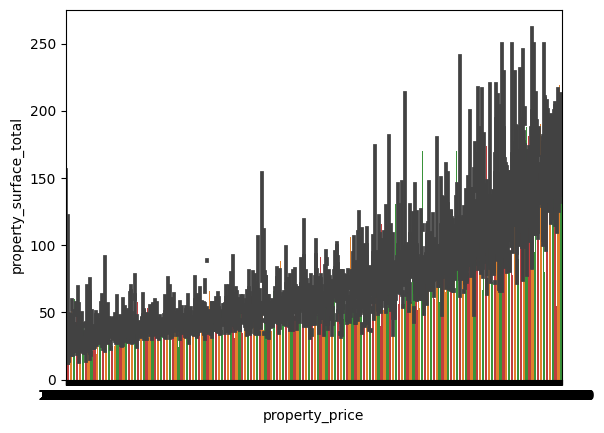

In [ ]:
# a revisar porque me quedo horribleeeeeee
sns.barplot(data=ds_target, x= 'property_price', y="property_surface_total", palette = ['tab:green', 'tab:orange', 'tab:red'])


- Graficamos la distribución del precio por metro cuadrado por tipo de propiedad

<AxesSubplot:xlabel='pxm2', ylabel='property_type'>

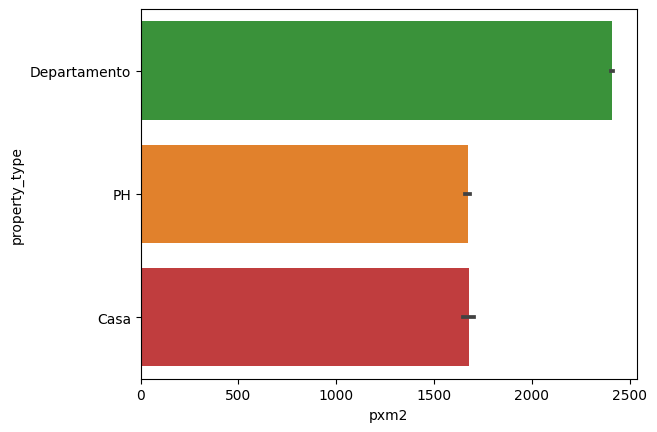

In [ ]:
sns.barplot(data=ds_target, x= 'pxm2', y="property_type", palette = ['tab:green', 'tab:orange', 'tab:red'])


- Una vez ya creada la nueva columna tipo_precio procedemos a clasificar en Alto, medio y bajo teniendo en cuenta el precio x metro cuadrado de cada propiedad.

- Para esto  evaluaremos las siguientes alternativas para establecer los límites de cada categoría:


1. Dividir la variable pxm2 en 3 intervalos con igual cantidad de observaciones.

In [10]:
categories=["bajo","medio","alto"]
ds_target["pxm2_intervalos_iguales"] = pd.qcut(ds_target["pxm2"],q=3, labels=categories)

In [ ]:
ds_target.head()

,start_date,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title,tipo_precio,pxm2,pxm2_intervalos_iguales
0,2021-09-09,-34.637319,-58.361124,Boca,Departamento,3.0,2.0,58.000000,55.0,82900.0,VENTA TRES AMBIENTES LA BOCA PISO ALTO,,1429.310345,bajo
1,2021-09-09,-34.628647,-58.361871,Boca,Departamento,4.0,3.0,70.000000,70.0,99000.0,Departamento - 4 Ambientes - Catalinas Sur,,1414.285714,bajo
2,2021-09-09,-34.610027,-58.401934,Once,Departamento,4.0,2.0,124.408727,104.0,146000.0,Venta departamento 4 ambientes Once,,1173.551114,bajo
3,2021-09-09,-34.631621,-58.416825,Boedo,PH,4.0,2.0,97.673080,73.0,250000.0,PH - Boedo,,2559.558895,alto
4,2021-09-09,-34.623886,-58.412746,Boedo,PH,2.0,1.0,61.000000,46.0,100000.0,PH 2 Ambientes c/Patio HECHO A NUEVO,,1639.344262,bajo


<AxesSubplot:>

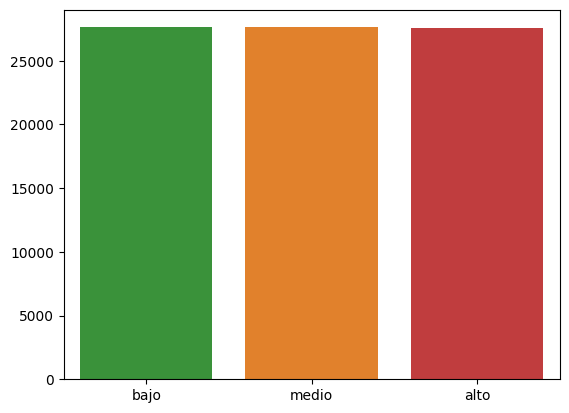

In [ ]:
sns.barplot(data=ds_target  , x= ds_target.groupby(['pxm2_intervalos_iguales']).count().index.tolist() , y=ds_target.groupby(['pxm2_intervalos_iguales']).count()['pxm2'].tolist() , palette = ['tab:green', 'tab:orange', 'tab:red'])

In [ ]:
print("\nPodemos observar que la cantidad de precios que fueron asignados como BAJOS corresponde a 1/3 del total ==",ds_target['pxm2_intervalos_iguales'].value_counts()['bajo'])
print("\nPodemos observar que la cantidad de precios que fueron asignados como MEDIOS corresponde a 1/3 del total ==",ds_target['pxm2_intervalos_iguales'].value_counts()['medio'])
print("\nPodemos observar que la cantidad de precios que fueron asignados como ALTOS corresponde a 1/3 del total ==",ds_target['pxm2_intervalos_iguales'].value_counts()['alto'])


Podemos observar que la cantidad de precios que fueron asignados como BAJOS corresponde a 1/3 del total == 27626

Podemos observar que la cantidad de precios que fueron asignados como MEDIOS corresponde a 1/3 del total == 27620

Podemos observar que la cantidad de precios que fueron asignados como ALTOS corresponde a 1/3 del total == 27607


2. Dividir la variable pxm2 en 3 intervalos, el primero con el 25% de las observaciones,el siguiente con el 50% y el último con el 25% de las observaciones restantes.

In [11]:
 ds_target["pxm2_intervalos_25p_50p_25p"]=pd.qcut(ds_target["pxm2"],q=[0,1/4,3/4,1], labels=categories)

In [ ]:
ds_target.head()

,start_date,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title,tipo_precio,pxm2,pxm2_intervalos_iguales,pxm2_intervalos_25p_50p_25p
0,2021-09-09,-34.637319,-58.361124,Boca,Departamento,3.0,2.0,58.000000,55.0,82900.0,VENTA TRES AMBIENTES LA BOCA PISO ALTO,,1429.310345,bajo,bajo
1,2021-09-09,-34.628647,-58.361871,Boca,Departamento,4.0,3.0,70.000000,70.0,99000.0,Departamento - 4 Ambientes - Catalinas Sur,,1414.285714,bajo,bajo
2,2021-09-09,-34.610027,-58.401934,Once,Departamento,4.0,2.0,124.408727,104.0,146000.0,Venta departamento 4 ambientes Once,,1173.551114,bajo,bajo
3,2021-09-09,-34.631621,-58.416825,Boedo,PH,4.0,2.0,97.673080,73.0,250000.0,PH - Boedo,,2559.558895,alto,medio
4,2021-09-09,-34.623886,-58.412746,Boedo,PH,2.0,1.0,61.000000,46.0,100000.0,PH 2 Ambientes c/Patio HECHO A NUEVO,,1639.344262,bajo,bajo


<AxesSubplot:>

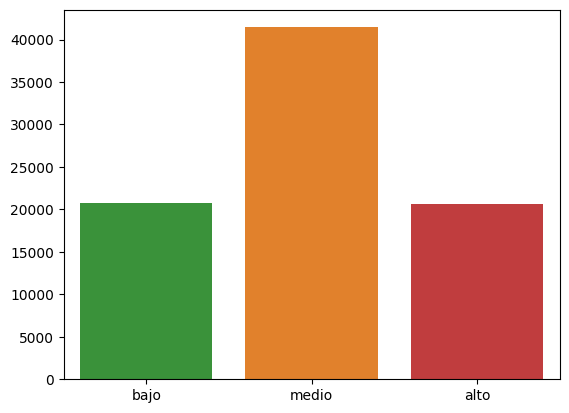

In [ ]:
sns.barplot(data=ds_target  , x= ds_target.groupby(['pxm2_intervalos_25p_50p_25p']).count().index.tolist() , y=ds_target.groupby(['pxm2_intervalos_25p_50p_25p']).count()['pxm2'].tolist() , palette = ['tab:green', 'tab:orange', 'tab:red'])

In [ ]:
ds_group1=ds_target.groupby(['pxm2_intervalos_25p_50p_25p']).count() 
ds_group1

,start_date,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title,tipo_precio,pxm2,pxm2_intervalos_iguales
pxm2_intervalos_25p_50p_25p,,,,,,,,,,,,,,
bajo,20715,20715,20715,20715,20715,20715,20715,20715,20715,20715,20715,20715,20715,20715
medio,41447,41447,41447,41447,41447,41447,41447,41447,41447,41447,41447,41447,41447,41447
alto,20691,20691,20691,20691,20691,20691,20691,20691,20691,20691,20691,20691,20691,20691


In [ ]:
print("\nPodemos observar que la cantidad de precios que fueron asignados como BAJOS corresponde al 25% ==",ds_target['pxm2_intervalos_25p_50p_25p'].value_counts()['bajo'])
print("\nPodemos observar que la cantidad de precios que fueron asignados como MEDIOS corresponde al 50% ==",ds_target['pxm2_intervalos_25p_50p_25p'].value_counts()['medio'])
print("\nPodemos observar que la cantidad de precios que fueron asignados como ALTOS corresponde al 25% ==",ds_target['pxm2_intervalos_25p_50p_25p'].value_counts()['alto'])


Podemos observar que la cantidad de precios que fueron asignados como BAJOS corresponde al 25% == 20715

Podemos observar que la cantidad de precios que fueron asignados como MEDIOS corresponde al 50% == 41447

Podemos observar que la cantidad de precios que fueron asignados como ALTOS corresponde al 25% == 20691


# Nota[Paula] ----> ALguien tiene idea porque no me da exacto el porcentaje?? Me deberia quedar igual el de bajos y altos .
# Probe asi 0,0.25,0.75,1 y como lo deje con fraccion y da igual

3. Trabajar la variable pxm2 relativa a cada tipo de propiedad y luego dividirla como en el punto anterior.

- Dividimos las filas segun tipo de propiedad y las guardamos en distintos datasets

In [12]:
ds_dpto= ds_target.loc[ds_target["property_type"]=="Departamento"]
ds_ph=ds_target.loc[ds_target["property_type"]=="PH"]
ds_casa=ds_target.loc[ds_target["property_type"]=="Casa"]

- Analizamos primero los departamentos

In [18]:
#ds_dpto["pxm2_dpto_intervalos_25p_50p_25p"]=pd.qcut(ds_dpto["pxm2"],q=[0,1/4,3/4,1], labels=categories)
ds_dpto["tipo_precio"]=pd.qcut(ds_dpto["pxm2"],q=[0,1/4,3/4,1], labels=categories)
ds_dpto.head()

,start_date,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title,tipo_precio,pxm2,pxm2_intervalos_iguales,pxm2_intervalos_25p_50p_25p,pxm2_dpto_intervalos_25p_50p_25p
0,2021-09-09,-34.637319,-58.361124,Boca,Departamento,3.0,2.0,58.000000,55.0,82900.0,VENTA TRES AMBIENTES LA BOCA PISO ALTO,bajo,1429.310345,bajo,bajo,bajo
1,2021-09-09,-34.628647,-58.361871,Boca,Departamento,4.0,3.0,70.000000,70.0,99000.0,Departamento - 4 Ambientes - Catalinas Sur,bajo,1414.285714,bajo,bajo,bajo
2,2021-09-09,-34.610027,-58.401934,Once,Departamento,4.0,2.0,124.408727,104.0,146000.0,Venta departamento 4 ambientes Once,bajo,1173.551114,bajo,bajo,bajo
6,2021-09-09,-34.629398,-58.425852,Boedo,Departamento,2.0,1.0,62.000000,44.0,100000.0,VENTA 2 ambientes EN DUPLEX sin Expensas en Boedo,bajo,1612.903226,bajo,bajo,bajo
7,2021-09-09,-34.620748,-58.412004,Boedo,Departamento,3.0,2.0,59.000000,55.0,185000.0,Venta depto 3 amb Boedo cochera fija y amenities.,alto,3135.593220,alto,alto,alto


<AxesSubplot:>

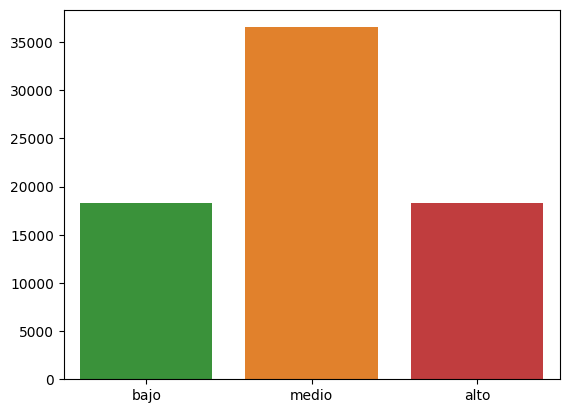

In [ ]:
sns.barplot(data=ds_dpto  , x= ds_dpto.groupby(['pxm2_dpto_intervalos_25p_50p_25p']).count().index.tolist() , y=ds_dpto.groupby(['pxm2_dpto_intervalos_25p_50p_25p']).count()['pxm2'].tolist(), palette = ['tab:green', 'tab:orange', 'tab:red'] )

In [ ]:
print("\nPodemos observar que la cantidad de precios que fueron asignados como BAJOS corresponde al 25% ==",ds_dpto['pxm2_dpto_intervalos_25p_50p_25p'].value_counts()['bajo'])
print("\nPodemos observar que la cantidad de precios que fueron asignados como MEDIOS corresponde al 50% ==",ds_dpto['pxm2_dpto_intervalos_25p_50p_25p'].value_counts()['medio'])
print("\nPodemos observar que la cantidad de precios que fueron asignados como ALTOS corresponde al 25% ==",ds_dpto['pxm2_dpto_intervalos_25p_50p_25p'].value_counts()['alto'])


Podemos observar que la cantidad de precios que fueron asignados como BAJOS corresponde al 25% == 18292

Podemos observar que la cantidad de precios que fueron asignados como MEDIOS corresponde al 50% == 36530

Podemos observar que la cantidad de precios que fueron asignados como ALTOS corresponde al 25% == 18274


- Luego analizamos los PH

In [19]:
#ds_ph["pxm2_ph_intervalos_25p_50p_25p"]=pd.qcut(ds_ph["pxm2"],q=[0,1/4,3/4,1], labels=categories)
ds_ph["tipo_precio"]=pd.qcut(ds_ph["pxm2"],q=[0,1/4,3/4,1], labels=categories)

ds_ph.head()

,start_date,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title,tipo_precio,pxm2,pxm2_intervalos_iguales,pxm2_intervalos_25p_50p_25p,pxm2_ph_intervalos_25p_50p_25p
3,2021-09-09,-34.631621,-58.416825,Boedo,PH,4.0,2.0,97.67308,73.0,250000.0,PH - Boedo,alto,2559.558895,alto,medio,alto
4,2021-09-09,-34.623886,-58.412746,Boedo,PH,2.0,1.0,61.00000,46.0,100000.0,PH 2 Ambientes c/Patio HECHO A NUEVO,medio,1639.344262,bajo,bajo,medio
5,2021-09-09,-34.625588,-58.423056,Boedo,PH,4.0,2.0,104.00000,54.0,185000.0,PH Venta PH 3 ambientes + Patio + Terraza Divino,medio,1778.846154,bajo,bajo,medio
8,2021-09-09,-34.626595,-58.420019,Boedo,PH,4.0,3.0,111.00000,101.0,110000.0,VENTA DEPARTAMENTO PH 4 AMBIENTES BOEDO C/ TER...,bajo,990.990991,bajo,bajo,bajo
11,2021-09-09,-34.627566,-58.411937,Boedo,PH,4.0,3.0,100.00000,100.0,180000.0,Ph a Estrenar Sanchez de Loria al 1500 100 m2 ...,medio,1800.000000,bajo,medio,medio


<AxesSubplot:>

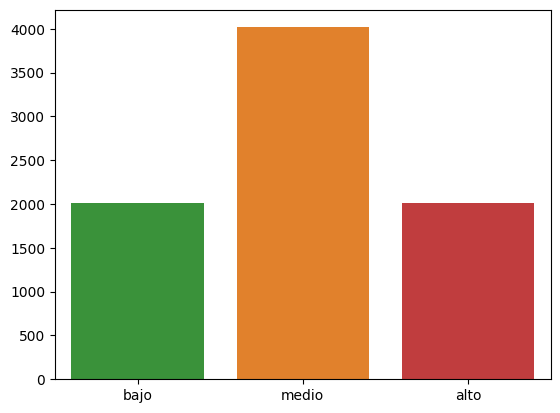

In [ ]:
sns.barplot(data=ds_ph  , x= ds_ph.groupby(['pxm2_ph_intervalos_25p_50p_25p']).count().index.tolist() , y=ds_ph.groupby(['pxm2_ph_intervalos_25p_50p_25p']).count()['pxm2'].tolist() , palette = ['tab:green', 'tab:orange', 'tab:red'])

In [ ]:
print("\nPodemos observar que la cantidad de precios que fueron asignados como BAJOS corresponde al 25% ==",ds_ph['pxm2_ph_intervalos_25p_50p_25p'].value_counts()['bajo'])
print("\nPodemos observar que la cantidad de precios que fueron asignados como MEDIOS corresponde al 50% ==",ds_ph['pxm2_ph_intervalos_25p_50p_25p'].value_counts()['medio'])
print("\nPodemos observar que la cantidad de precios que fueron asignados como ALTOS corresponde al 25% ==",ds_ph['pxm2_ph_intervalos_25p_50p_25p'].value_counts()['alto'])


Podemos observar que la cantidad de precios que fueron asignados como BAJOS corresponde al 25% == 2010

Podemos observar que la cantidad de precios que fueron asignados como MEDIOS corresponde al 50% == 4018

Podemos observar que la cantidad de precios que fueron asignados como ALTOS corresponde al 25% == 2009


- Y por ultimo analizamos las casas

In [20]:
#ds_casa["pxm2_casa_intervalos_25p_50p_25p"]=pd.qcut(ds_casa["pxm2"],q=[0,1/4,3/4,1], labels=categories)
ds_casa["tipo_precio"]=pd.qcut(ds_casa["pxm2"],q=[0,1/4,3/4,1], labels=categories)

ds_casa.head()

,start_date,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title,tipo_precio,pxm2,pxm2_intervalos_iguales,pxm2_intervalos_25p_50p_25p,pxm2_casa_intervalos_25p_50p_25p
12,2021-09-09,-34.627566,-58.411937,Boedo,Casa,4.0,3.0,100.0,100.0,180000.0,Ph a Estrenar Sanchez de Loria al 1500 100 m2 ...,medio,1800.000000,bajo,medio,medio
55,2021-09-09,-34.583154,-58.435311,Palermo,Casa,4.0,3.0,181.0,133.0,360000.0,VENTA CASA 2 PLANTAS BALCON TERRAZA PALERMO,alto,1988.950276,medio,medio,alto
145,2021-09-09,-34.627209,-58.524888,Versalles,Casa,4.0,2.0,98.0,93.0,275000.0,Complejo residencial duplex en versalles 4 amb...,alto,2806.122449,alto,alto,alto
201,2021-09-09,-34.627566,-58.411937,San Cristobal,Casa,4.0,3.0,100.0,100.0,180000.0,Ph a Estrenar Sanchez de Loria al 1500 100 m2 ...,medio,1800.000000,bajo,medio,medio
269,2021-12-17,-34.568135,-58.442637,Palermo,Casa,5.0,4.0,260.0,200.0,750000.0,VENTA CASA 5 AMBIENTES CON JARDIN PALERMO,alto,2884.615385,alto,alto,alto


<AxesSubplot:>

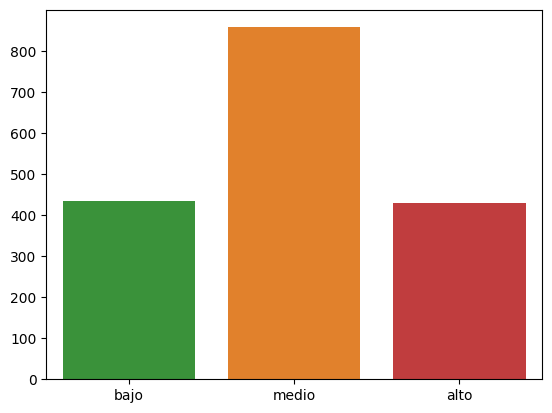

In [ ]:
sns.barplot(data=ds_casa  , x= ds_casa.groupby(['pxm2_casa_intervalos_25p_50p_25p']).count().index.tolist() , y=ds_casa.groupby(['pxm2_casa_intervalos_25p_50p_25p']).count()['pxm2'].tolist(), palette = ['tab:green', 'tab:orange', 'tab:red'] )

In [ ]:
print("\nPodemos observar que la cantidad de precios que fueron asignados como BAJOS corresponde al 25% ==",ds_casa['pxm2_casa_intervalos_25p_50p_25p'].value_counts()['bajo'])
print("\nPodemos observar que la cantidad de precios que fueron asignados como MEDIOS corresponde al 50% ==",ds_casa['pxm2_casa_intervalos_25p_50p_25p'].value_counts()['medio'])
print("\nPodemos observar que la cantidad de precios que fueron asignados como ALTOS corresponde al 25% ==",ds_casa['pxm2_casa_intervalos_25p_50p_25p'].value_counts()['alto'])


Podemos observar que la cantidad de precios que fueron asignados como BAJOS corresponde al 25% == 433

Podemos observar que la cantidad de precios que fueron asignados como MEDIOS corresponde al 50% == 857

Podemos observar que la cantidad de precios que fueron asignados como ALTOS corresponde al 25% == 430


# Hay q elegir 1 de las tres y porque 
[Paula]----> Yo eligiria la 3 opcion porque me parece que es logico que sea un procentaje menor para los extremos es decir los precios mas bajos y mas altos y que muchos de ellos se encuentren como precio medio. Despues me parece bien que se analice por tipo de propiedad ya que no es lo mismo un precio alto para un departamento que para una casa o un ph . En mi opinion habria q comparar a cada propiedad con otras del mismo typo.

- Luego de haber decidido el criterio numero 3  para calsificar tipo_precio , mergeamos los 3 datasets en uno nuevo .

In [21]:
#merge all DataFrames into one
final_df = pd.concat([ds_dpto, ds_ph, ds_casa])

In [22]:
final_df.head()

,start_date,latitud,longitud,place_l3,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title,tipo_precio,pxm2,pxm2_intervalos_iguales,pxm2_intervalos_25p_50p_25p,pxm2_dpto_intervalos_25p_50p_25p,pxm2_ph_intervalos_25p_50p_25p,pxm2_casa_intervalos_25p_50p_25p
0,2021-09-09,-34.637319,-58.361124,Boca,Departamento,3.0,2.0,58.000000,55.0,82900.0,VENTA TRES AMBIENTES LA BOCA PISO ALTO,bajo,1429.310345,bajo,bajo,bajo,NaN,NaN
1,2021-09-09,-34.628647,-58.361871,Boca,Departamento,4.0,3.0,70.000000,70.0,99000.0,Departamento - 4 Ambientes - Catalinas Sur,bajo,1414.285714,bajo,bajo,bajo,NaN,NaN
2,2021-09-09,-34.610027,-58.401934,Once,Departamento,4.0,2.0,124.408727,104.0,146000.0,Venta departamento 4 ambientes Once,bajo,1173.551114,bajo,bajo,bajo,NaN,NaN
6,2021-09-09,-34.629398,-58.425852,Boedo,Departamento,2.0,1.0,62.000000,44.0,100000.0,VENTA 2 ambientes EN DUPLEX sin Expensas en Boedo,bajo,1612.903226,bajo,bajo,bajo,NaN,NaN
7,2021-09-09,-34.620748,-58.412004,Boedo,Departamento,3.0,2.0,59.000000,55.0,185000.0,Venta depto 3 amb Boedo cochera fija y amenities.,alto,3135.593220,alto,alto,alto,NaN,NaN


# hay q Comparar, si aplica, la alternativa seleccionada con la división en 3 grupos obtenida utilizando agrupamiento por K Means.

- Dividimos en 3 grupos segun si su precio es medio , alto y bajo y visualizamos los grupos en una mapa de CABA 

In [40]:
group1=final_df.loc[final_df["tipo_precio"]=="bajo"]
group2=final_df.loc[final_df["tipo_precio"]=="medio"]
group3=final_df.loc[final_df["tipo_precio"]=="alto"]


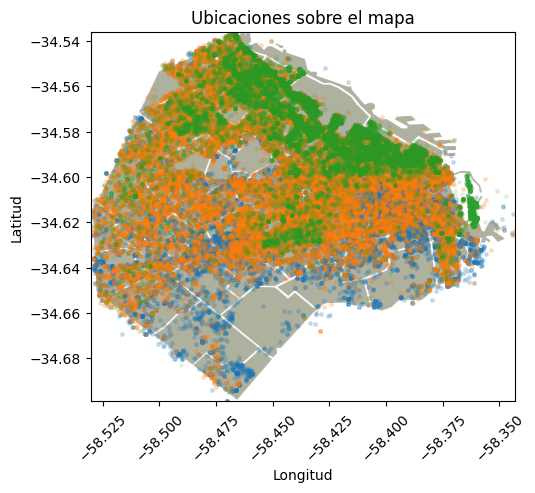

In [42]:
# calculamos limites de la imagen
lat_min = final_df['latitud'].min()
lat_max = final_df['latitud'].max()
long_min = final_df['longitud'].min()
long_max = final_df['longitud'].max()

# seteamos limites del grafico
plt.xlim([long_min, long_max])
plt.ylim([lat_min,lat_max])

# cargamos imagen y ajustamos su tamaño
im = plt.imread("mapa.png")
plt.imshow(im, extent=[long_min-0.0075, long_max+0.0025, lat_min, lat_max])

# graficamos los puntos
plt.scatter(x=group1.longitud,y=group1.latitud ,s=25 ,cmap='viridis', alpha=0.2, marker='.')
plt.scatter(x=group2.longitud,y=group2.latitud ,s=25 ,cmap='viridis', alpha=0.2, marker='.')
plt.scatter(x=group3.longitud,y=group3.latitud ,s=25 ,cmap='viridis', alpha=0.1, marker='.')

plt.title('Ubicaciones sobre el mapa')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.tick_params(axis='x', labelrotation = 45)
plt.show()

### b) Entrenamiento y Predicción

### Modelo 1 : Árbol de decisión

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7da1cea6-caf2-4c30-b019-068f1fb82c77' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>